In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('ushape.csv',names=['X','Y','class'])
df

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
95,1.699453,0.587720,1.0
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0


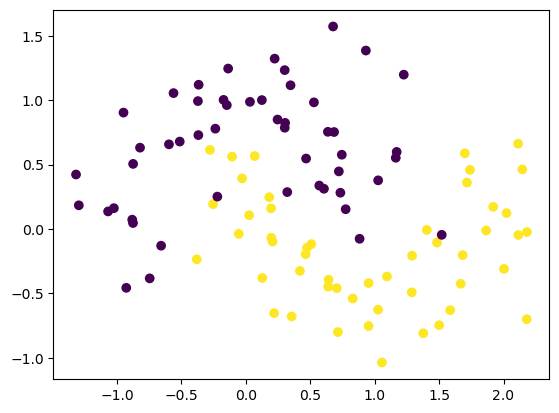

In [31]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [32]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [33]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [34]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.get_weights()

[array([[-0.21438482,  0.02080572, -0.40657732,  0.03317869,  0.27817678,
          0.6802601 ,  0.03493673, -0.01595813, -0.47895813, -0.44651684],
        [ 0.6170384 , -0.02721256, -0.15743434, -0.18579006, -0.34051973,
          0.4233113 ,  0.37268227,  0.00494009, -0.4014939 ,  0.28743458]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.03087002, -0.0620749 , -0.30793437,  0.2092787 ,  0.01110685,
          0.4952358 ,  0.04155415,  0.4450279 ,  0.11087823,  0.52778804],
        [-0.07680646,  0.46164787, -0.17863315,  0.17280167, -0.4476515 ,
          0.54517186, -0.08400768,  0.28918296,  0.42428344,  0.04178768],
        [ 0.2773425 , -0.46820122,  0.20564646, -0.16026333, -0.02702671,
         -0.36380455,  0.07162946,  0.1224941 , -0.4049146 , -0.53634936],
        [-0.13350013,  0.14356863,  0.04827821, -0.06700823, -0.23973414,
         -0.2790712 , -0.15421125, -0.355895  ,  0.06127882,  0.16547257],
        [-0.13909

In [36]:
initial_weights = model.get_weights()

In [37]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [38]:
model.set_weights(initial_weights)

In [39]:
model.get_weights()

[array([[-0.18941376,  0.22601159,  0.8099249 , -1.3122138 , -1.0237303 ,
         -0.36232555, -0.29942378,  0.2360748 ,  0.6464311 ,  0.8789138 ],
        [ 0.78726536,  0.78414255,  0.97160167, -0.361336  , -0.2416224 ,
         -0.77677137,  0.05489317,  0.28995076, -0.6454328 , -0.43493804]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.64299345,  0.3579528 ,  0.6204936 ,  0.01008982,  0.24908078,
          0.14029291,  0.20097202, -0.6156777 , -0.3121326 ,  0.15810056],
        [-0.1824644 , -0.5695652 , -0.1248571 ,  0.24961959,  0.19677575,
          0.2985    ,  0.35647452,  0.502506  ,  0.6961607 ,  0.46906573],
        [ 0.22844546, -0.22173554,  0.03915369,  0.15262905,  0.53510535,
         -0.27073252, -0.11200416,  0.01468973,  0.38599738, -0.49089316],
        [ 0.13092293,  0.22528304,  0.09474347,  0.5891363 ,  0.6352188 ,
         -0.28355336, -0.14654033,  0.04952781,  0.11823174, -0.39856547],
        [ 0.05327

In [40]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.2203 - loss: 0.7544 - val_accuracy: 0.3500 - val_loss: 0.7279
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3484 - loss: 0.7357 - val_accuracy: 0.5500 - val_loss: 0.7078
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4094 - loss: 0.7185 - val_accuracy: 0.7000 - val_loss: 0.6890
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5219 - loss: 0.7017 - val_accuracy: 0.7000 - val_loss: 0.6716
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5805 - loss: 0.6899 - val_accuracy: 0.7500 - val_loss: 0.6559
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5984 - loss: 0.6771 - val_accuracy: 0.7500 - val_loss: 0.6407
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6148 - loss: 0.6658 - val_accuracy: 0.8000 - val_loss: 0.6261
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5938 - loss: 0.6597 - val_accuracy: 0.8000 - val_loss:

In [42]:
model.get_weights()

[array([[-0.22940886,  0.0888056 ,  0.8048461 , -1.3999932 , -1.0700549 ,
         -0.34820223, -0.36678085,  0.22872646,  0.5060358 ,  0.68566614],
        [ 0.7985885 ,  0.8814098 ,  1.0791683 , -0.22693291, -0.17175412,
         -0.62211865,  0.10329261,  0.29437414, -0.71637064, -0.59262913]],
       dtype=float32),
 array([ 0.01778629, -0.05762131, -0.15689288,  0.15893105, -0.03720238,
         0.04843662, -0.1571886 ,  0.0569625 , -0.079197  , -0.05849548],
       dtype=float32),
 array([[ 7.53023982e-01,  2.06412822e-01,  5.50199568e-01,
         -7.84996077e-02,  3.80007446e-01,  4.04400900e-02,
          3.35229576e-01, -6.89035177e-01, -4.47145253e-01,
          2.66662240e-01],
        [-1.04523957e-01, -6.71806931e-01, -2.01367304e-01,
          1.72038391e-01,  3.07894170e-01,  1.83079511e-01,
          4.62239563e-01,  4.50115442e-01,  5.35767853e-01,
          5.68509221e-01],
        [ 2.61158168e-01, -2.91985065e-01,  4.95324821e-06,
          1.19953752e-01,  6.37541

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 476us/step


<Axes: >

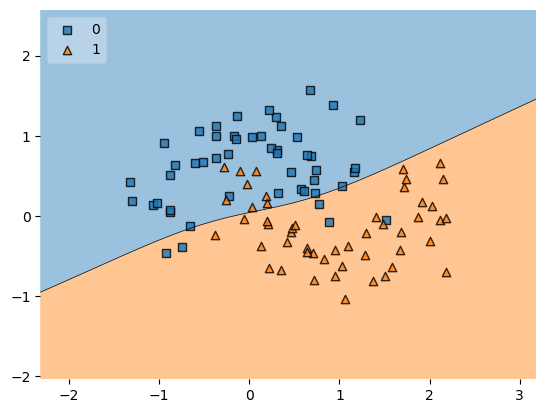

In [43]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# Using keras implementation

In [44]:
model = Sequential()

model.add(Dense(10, activation='tanh', input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10, activation='tanh',kernel_initializer='he_normal'))
model.add(Dense(10, activation='tanh',kernel_initializer='he_normal'))
model.add(Dense(10, activation='tanh',kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.get_weights()

[array([[-0.35667482, -0.93823975,  0.68735623,  0.17731126, -0.01541207,
          0.07914748,  1.0496255 , -0.49843055,  0.31599006,  1.9270903 ],
        [ 1.1023388 , -0.15085511, -0.2426333 ,  0.554753  ,  0.8198637 ,
         -1.999284  ,  0.51875937, -0.6890958 ,  0.64782864, -0.6689807 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.81269634,  0.02815853,  0.11168697,  0.13844611,  0.51524925,
          0.597138  ,  0.448998  , -0.03760041,  0.17589985, -0.3529454 ],
        [ 0.12177805, -0.563012  ,  0.33359534,  0.07423419, -0.09832897,
         -0.22085565, -0.2293302 ,  0.28270477,  0.37755615,  0.1469089 ],
        [-0.4330847 ,  0.14059134, -0.11497153,  0.4678002 ,  0.30886778,
          0.79499406,  0.04858366,  0.11557923,  0.16909236, -0.0846972 ],
        [-0.6534756 ,  0.37042403, -0.3643821 , -0.494998  , -0.05493988,
          0.04888066,  0.5138827 , -0.6393546 , -0.62124664,  0.92828095],
        [ 0.17820

In [46]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
history = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.6414 - loss: 0.6216 - val_accuracy: 0.6000 - val_loss: 0.6099
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6711 - loss: 0.5982 - val_accuracy: 0.6500 - val_loss: 0.5720
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6359 - loss: 0.5972 - val_accuracy: 0.7500 - val_loss: 0.5387
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6820 - loss: 0.5587 - val_accuracy: 0.8500 - val_loss: 0.5102
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7055 - loss: 0.5712 - val_accuracy: 0.8000 - val_loss: 0.4860
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7805 - loss: 0.5350 - val_accuracy: 0.8000 - val_loss: 0.4646
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7883 - loss: 0.5040 - val_accuracy: 0.8000 - val_loss: 0.4459
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8062 - loss: 0.5041 - val_accuracy: 0.8000 - val_loss:

In [48]:
model.get_weights()

[array([[-0.47153175, -0.7501105 ,  0.64731055,  0.24759859,  0.07745051,
          0.11271964,  1.1970644 , -0.49629825,  0.2560637 ,  1.7832359 ],
        [ 1.1449999 , -0.12739772, -0.18232502,  0.43706945,  0.9215272 ,
         -1.9997356 ,  0.5285822 , -0.8158748 ,  0.76376635, -0.7775487 ]],
       dtype=float32),
 array([ 0.01640889,  0.25969255, -0.12571031, -0.05669685,  0.21881999,
         0.00361642,  0.21670946,  0.01009152, -0.00215648,  0.04560504],
       dtype=float32),
 array([[ 1.003573  ,  0.07137597, -0.0162924 ,  0.20410354,  0.64092994,
          0.70562965,  0.60993695,  0.09914272,  0.20075734, -0.49840993],
        [ 0.1146607 , -0.5790697 ,  0.26119146,  0.06809345, -0.04679787,
         -0.23328465, -0.14030619,  0.33746365,  0.46250278,  0.08244514],
        [-0.49279398,  0.10730645, -0.01594701,  0.44716084,  0.2223952 ,
          0.72554773, -0.09007312,  0.01827808,  0.09322135,  0.01846182],
        [-0.6437746 ,  0.40673795, -0.27086884, -0.4568157 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 498us/step


<Axes: >

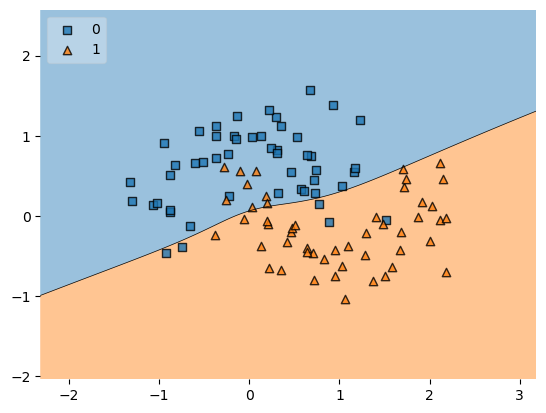

In [49]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)